# LSIの配線のインピーダンス解析

Conductor 1 charge density range: -1.54441192890522e-11 2.18976172863267e-11
Conductor 1 total charge: 3.968586842786826e-19
Conductor 2 charge density range: -3.1384112136224854e-11 2.209922447759674e-11
Conductor 2 total charge: -5.756865738823629e-19
Conductor 3 charge density range: -2.95534060544874e-11 4.224531568775358e-11
Conductor 3 total charge: 7.687216328529162e-19


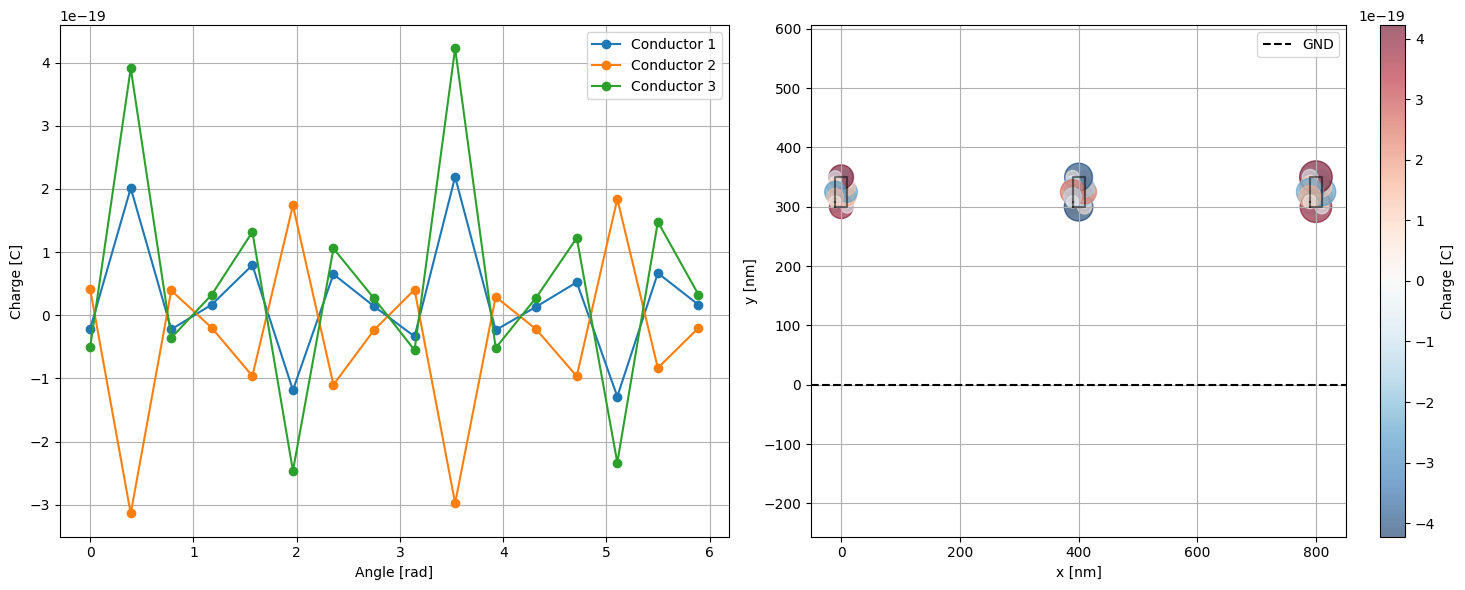

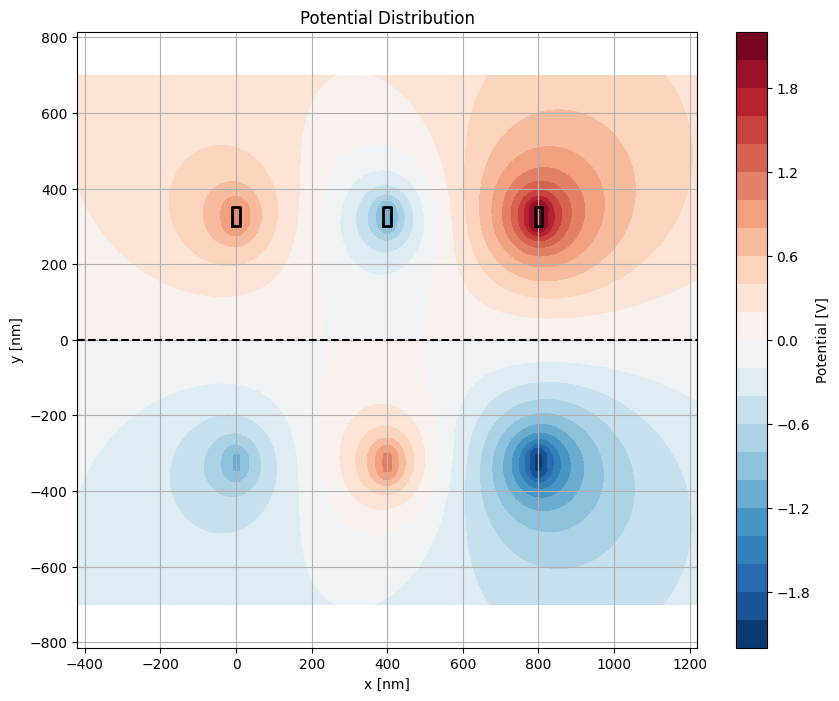

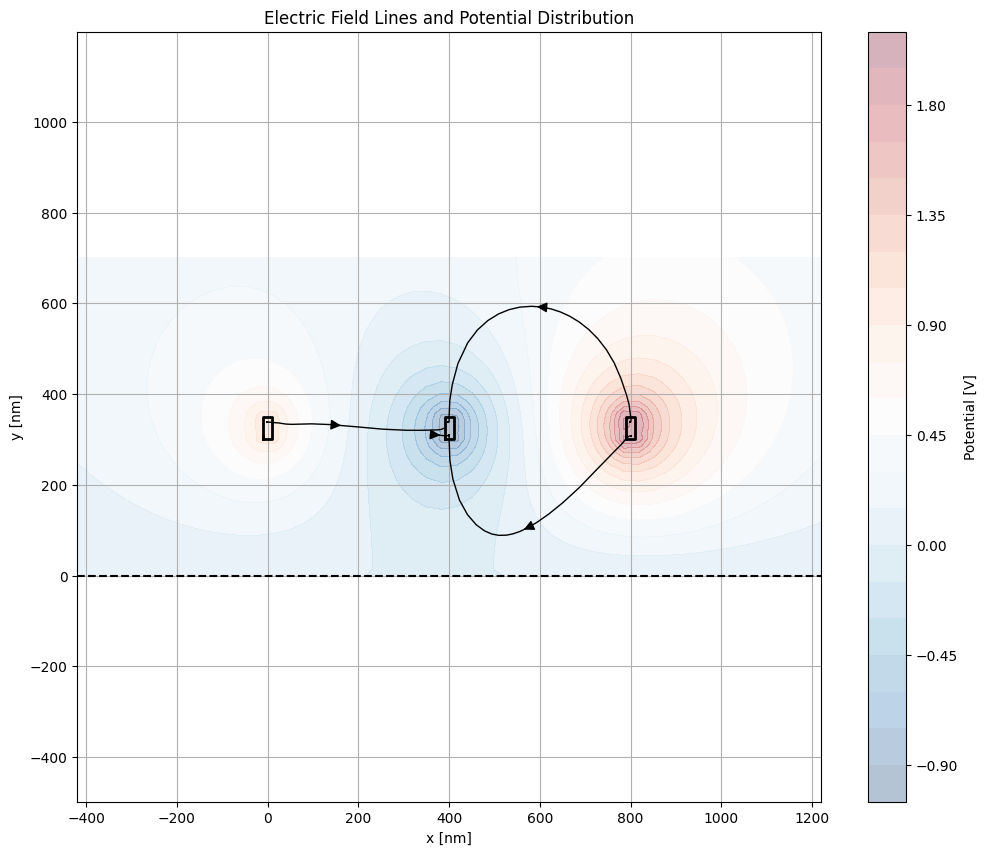


 C Matrix [F/m]:
[[ 3.63009915e-11 -6.96194009e-12 -1.47441148e-12]
 [-6.96194009e-12  3.76006476e-11 -6.96194009e-12]
 [-1.47441148e-12 -6.96194009e-12  3.63009915e-11]]

 L Matrix [H/m]:
[[6.39553707e-07 1.27762889e-07 5.04791420e-08]
 [1.27762889e-07 6.39124211e-07 1.27762889e-07]
 [5.04791420e-08 1.27762889e-07 6.39553707e-07]]

 Z Matrix [H/m]:
[[138.66973311  87.35762607  60.29232418]
 [ 87.35762607 140.79650348  87.35762607]
 [ 60.29232418  87.35762607 138.66973311]]
Conductor 1 charge density range: -1.4503083653899756e-12 1.0615786044502218e-12
Conductor 1 total charge: -2.1017704308953326e-20
Conductor 2 charge density range: -3.321050660902564e-11 1.529591388342678e-11
Conductor 2 total charge: -3.819663462266407e-19
Conductor 3 charge density range: -2.0931075087409015e-11 3.7554087821979174e-11
Conductor 3 total charge: 5.480310349884542e-19
Conductor 4 charge density range: -3.3210506609024537e-11 1.5295913883427477e-11
Conductor 4 total charge: -3.8191290882276688e-19
C

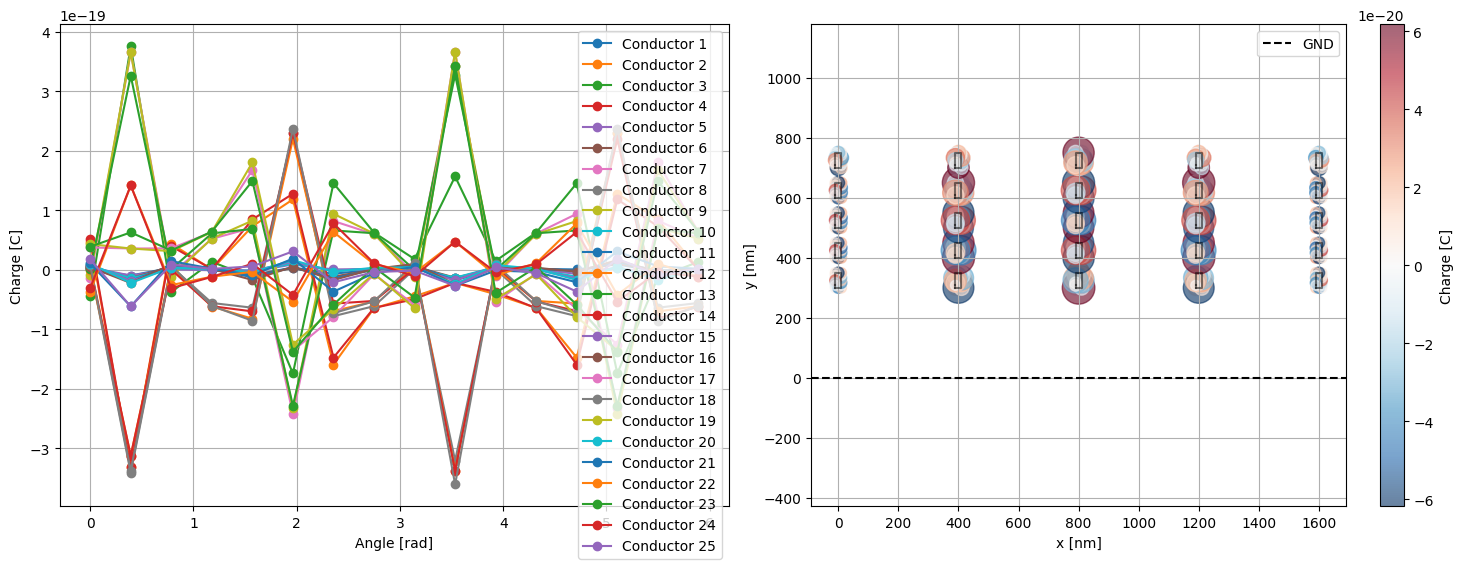

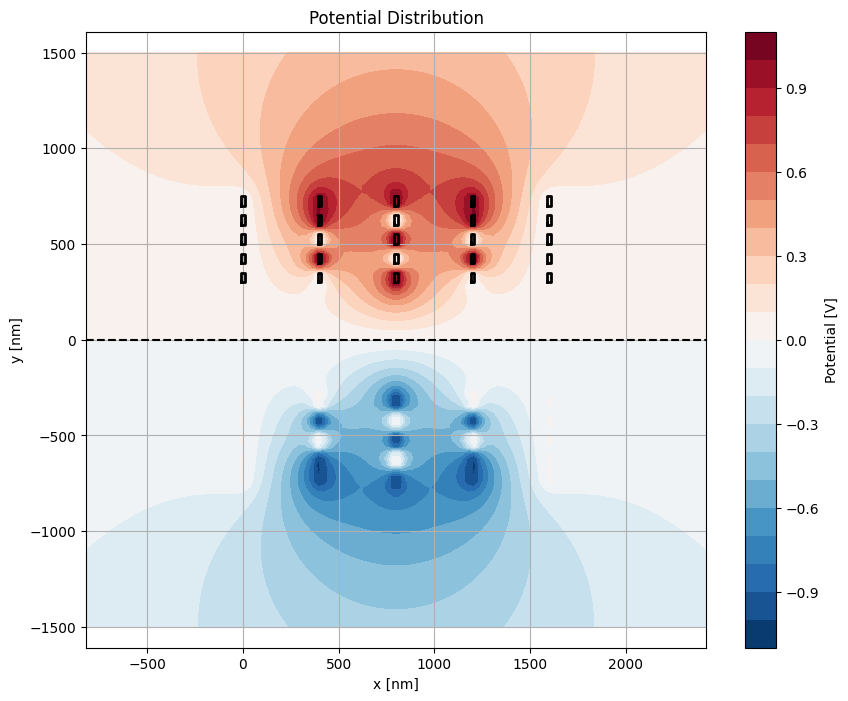

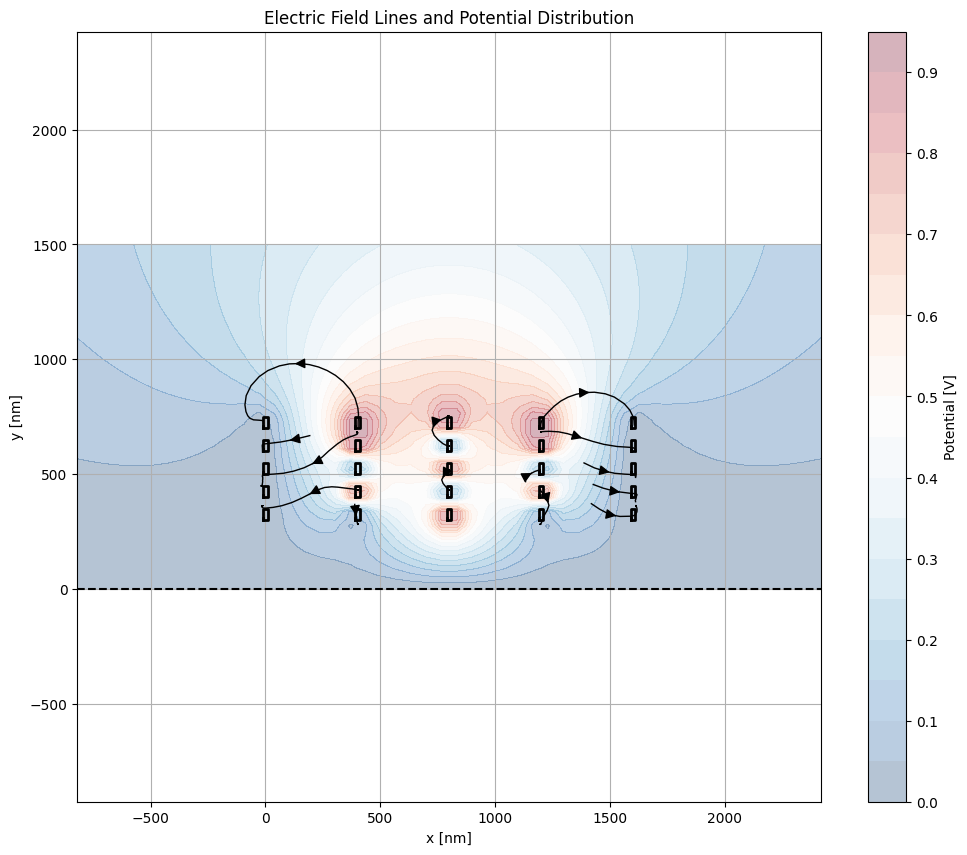


 C Matrix [F/m]:
[[ 6.04774750e-11 -2.34893014e-12 -6.52648581e-14 -2.90771906e-15
  -2.25647564e-15 -3.39825919e-11 -1.17600254e-12 -2.72621993e-14
  -2.18842383e-15 -2.51206016e-15 -1.37478857e-12 -7.44968941e-13
  -2.09464441e-14 -3.76139560e-15 -4.14227073e-15 -1.48614981e-12
  -4.03033220e-13 -2.01216757e-14 -6.66175405e-15 -6.43981058e-15
  -1.01691156e-12 -3.57861137e-13 -6.62669812e-14 -3.30921511e-14
  -2.58362625e-14]
 [-2.34893014e-12  6.09108136e-11 -2.33645290e-12 -6.40214986e-14
  -2.90771906e-15 -1.17756894e-12 -3.36535312e-11 -1.16782975e-12
  -2.55263896e-14 -1.77174382e-15 -7.43315452e-13 -1.04631449e-12
  -7.33164825e-13 -1.70730033e-14 -2.18782606e-15 -3.93860190e-13
  -1.18565523e-12 -3.84051567e-13 -1.26986236e-14 -3.05161872e-15
  -2.91120705e-13 -5.47184020e-13 -2.75069453e-13 -2.86739425e-14
  -1.17355372e-14]
 [-6.52648581e-14 -2.33645290e-12  6.09111830e-11 -2.33645290e-12
  -6.52648581e-14 -2.66424382e-14 -1.16780588e-12 -3.36532734e-11
  -1.16780588e-12 -2

In [1]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer

# RECT 3x1のテスト
def test_rect3x1():
  calculator = MultiConductorCalculator(type="MS", epsilon_r=2.0)
  w = 20e-9
  h = 50e-9
  n = 20
  bh1 = 300e-9
  xo1 = 0
  xo2 = 400e-9
  xo3 = 800e-9

  # Add rectangular conductor
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )

  voltages = [1.0,-1.0, 2.0]
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density) 
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # fF/1umで出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_rect3x1.csv", unit_prefix='f' , length=1e-6 )


# RECT 5x5のテスト
def test_rect5x5():
  calculator = MultiConductorCalculator(type="MS", epsilon_r=2.0)
    
  w = 20e-9
  h = 50e-9
  n = 20
  bh1 = 300e-9
  bh2 = 400e-9
  bh3 = 500e-9
  bh4 = 600e-9
  bh5 = 700e-9
  xo1 = 0
  xo2 = 400e-9
  xo3 = 800e-9
  xo4 = 1200e-9
  xo5 = 1600e-9
    
  # Add rectangular conductor
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo5  )

  # Modified voltages array to match the number of conductors
  voltages = [0.0 ,0.0, 1.0, 0.0, 0.0,
              0.0 ,1.0, 0.0, 1.0, 0.0,
              0.0 ,0.0, 1.0, 0.0, 0.0,
              0.0 ,1.0, 0.0, 1.0, 0.0,
              0.0 ,1.0, 1.0, 1.0, 0.0]  # Only one voltage for one conductor
  
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density) 
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # fF/1umで出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_rect5x5.csv", unit_prefix='f' , length=1e-6 )


if __name__ == "__main__":
  test_rect3x1()
  test_rect5x5()
